<a href="https://colab.research.google.com/github/pulindu-seniya-silva/magic-dataset-Machine-Learning/blob/main/Magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [37]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long", "FM3Trans", 'fAlpha', "fDist", "class" ]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


from matplotlib import pyplot as plt
_df_0['fLength'].plot(kind='hist', bins=20, title='fLength')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['fWidth'].plot(kind='hist', bins=20, title='fWidth')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['fSize'].plot(kind='hist', bins=20, title='fSize')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['fConc'].plot(kind='hist', bins=20, title='fConc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='fLength', y='fWidth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='fWidth', y='fSize', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='fSize', y='fConc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='fConc', y='fConcl', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['fLength'].plot(kind='line', figsize=(8, 4), title='fLength')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['fWidth'].plot(kind='line', figsize=(8, 4), title='fWidth')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['fSize'].plot(kind='line', figsize=(8, 4), title='fSize')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['fConc'].plot(kind='line', figsize=(8, 4), title='fConc')
plt.gca().spines[['top', 'right']].set_visible(False)

In [38]:
print(df["class"].unique())
df["class"] = (df["class"] == "g").astype(int)

['g' 'h']


In [39]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


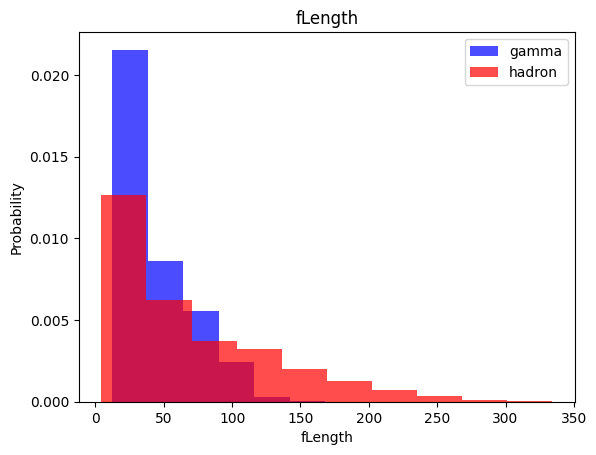

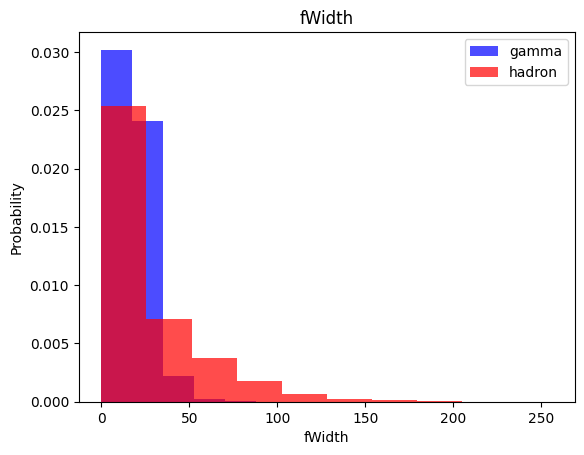

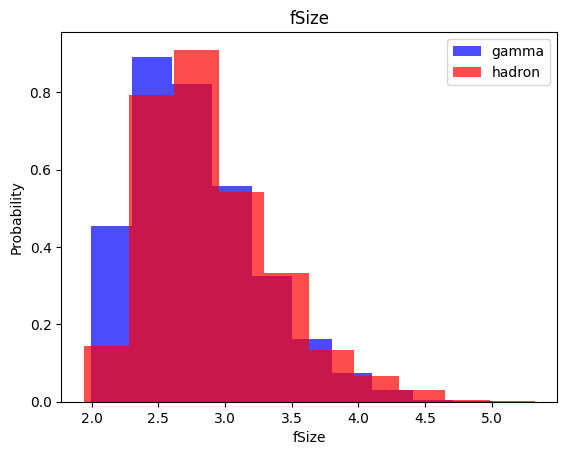

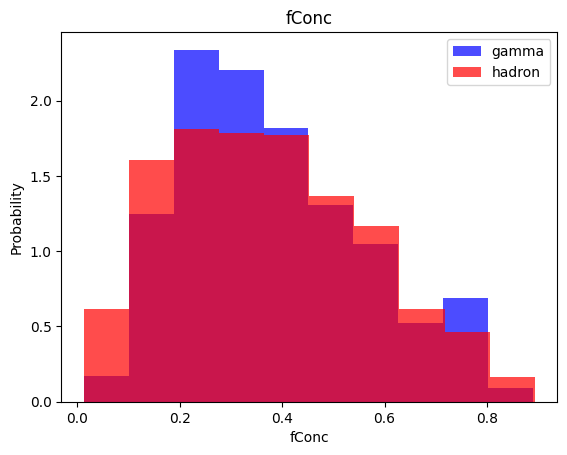

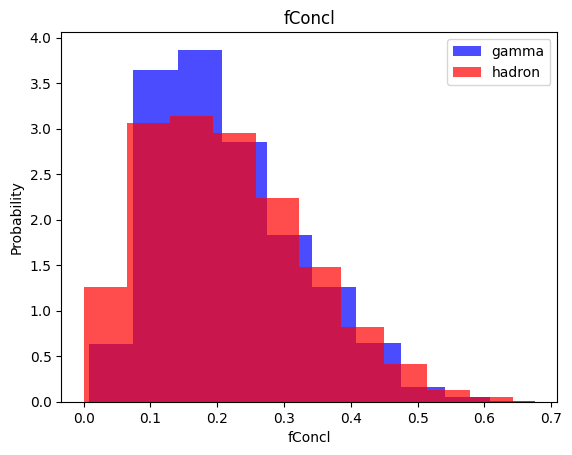

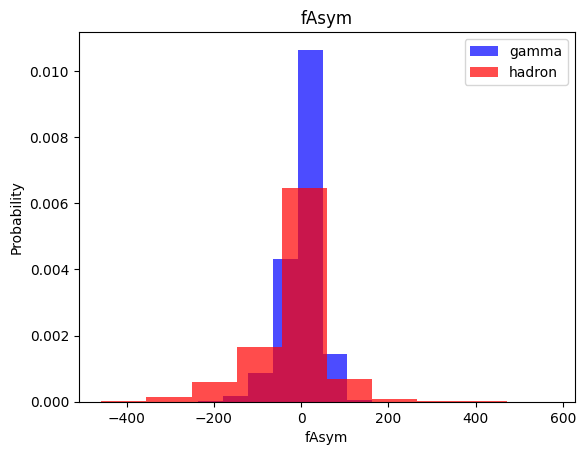

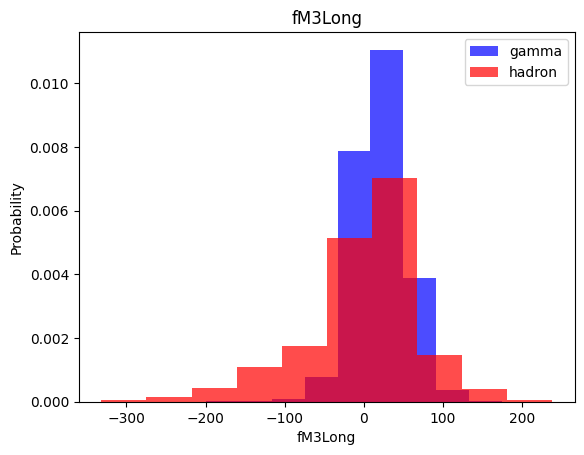

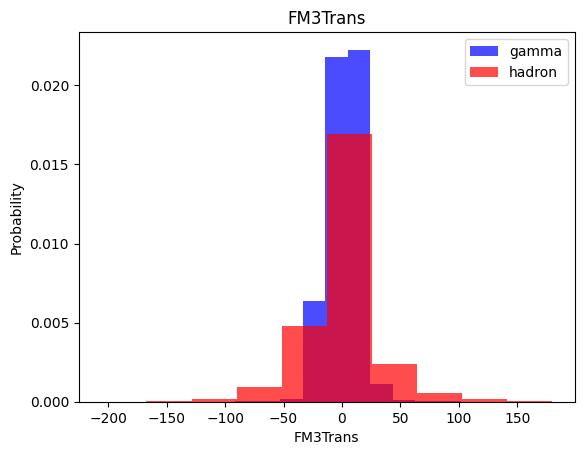

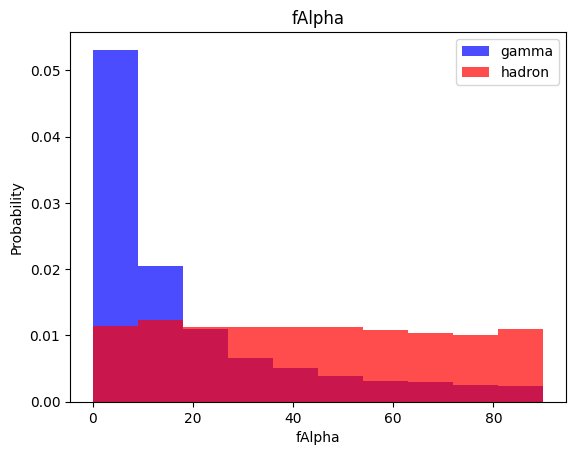

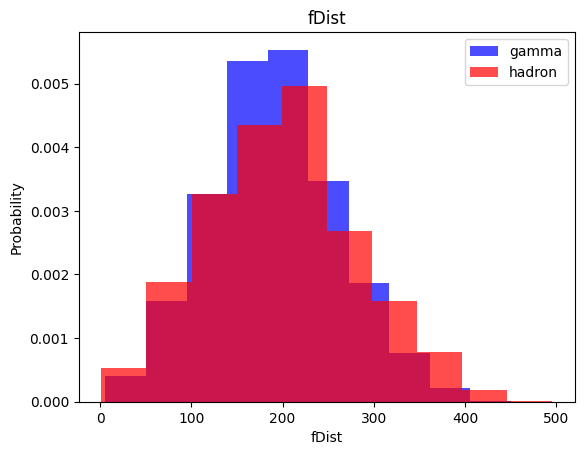

In [40]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [41]:
#Train, validation, test datasets
train_frac = 0.6
valid_frac = 0.2
test_frac = 0.2

train = df.sample(frac=train_frac, random_state=42)
valid = df.drop(train.index).sample(frac=valid_frac/(1-train_frac), random_state=42)
test = df.drop(train.index).drop(valid.index)

In [42]:
def scale_dataset(dataframe, oversample=False, return_scaler=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  # Return X and y separately
  if return_scaler:
    return X, y, scaler
  return X, y


In [43]:
# Train, validation, test datasets
# Note: The original code had train, valid, test as dataframes.
# After scaling, they are numpy arrays.
# I am keeping the variable names consistent with the rest of the notebook.
X_train, y_train, scaler = scale_dataset(train, oversample=False, return_scaler=True)
X_valid, y_valid = scale_dataset(valid, oversample=False)
X_test, y_test = scale_dataset(test, oversample=False)

#KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
y_pred = knn_model.predict(X_test)

In [47]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [48]:
y_test

array([1, 1, 1, ..., 0, 0, 0])

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.63      0.72      1360
           1       0.82      0.94      0.87      2444

    accuracy                           0.83      3804
   macro avg       0.83      0.78      0.80      3804
weighted avg       0.83      0.83      0.82      3804



In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [52]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.40      0.53      1360
           1       0.74      0.93      0.82      2444

    accuracy                           0.74      3804
   macro avg       0.75      0.67      0.68      3804
weighted avg       0.75      0.74      0.72      3804



Log Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [55]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.61      0.68      1360
           1       0.80      0.90      0.85      2444

    accuracy                           0.80      3804
   macro avg       0.79      0.75      0.76      3804
weighted avg       0.79      0.80      0.79      3804



SVM

In [56]:
from sklearn.svm import SVC

In [57]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [58]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1360
           1       0.85      0.96      0.90      2444

    accuracy                           0.86      3804
   macro avg       0.88      0.83      0.84      3804
weighted avg       0.87      0.86      0.86      3804



# Neutral Net


In [59]:
import tensorflow  as tf

In [60]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()


In [61]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(X_train.shape[1], )),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')

  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
            metrics=['accuracy'])

  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), verbose=0
  )

  return nn_model, history

32 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


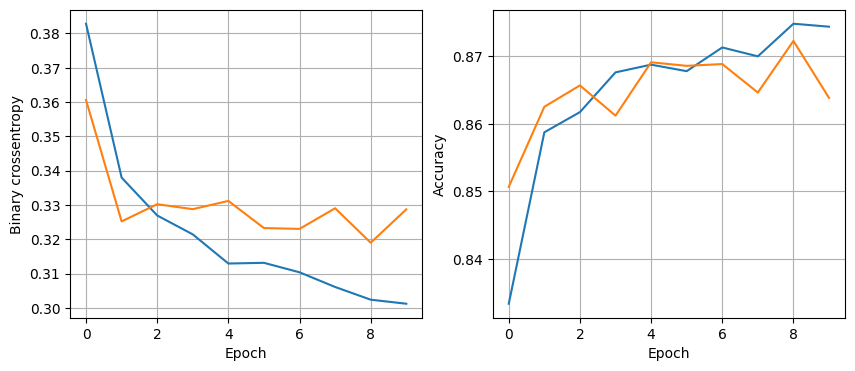

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8666 - loss: 0.3273
32 nodes, dropout 0, lr 0.01, batch size 64


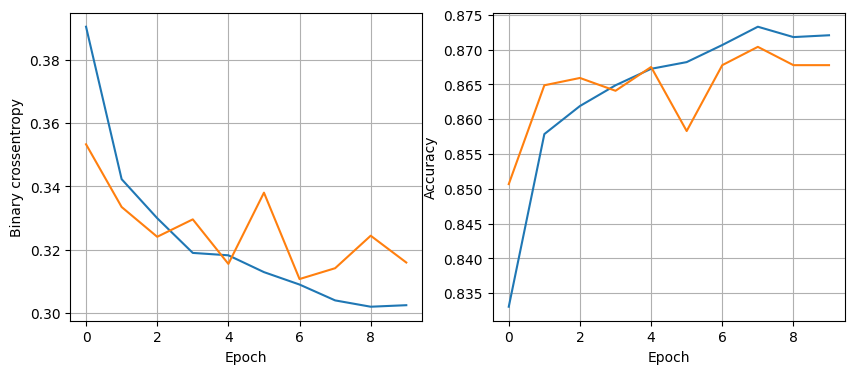

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8762 - loss: 0.3088
32 nodes, dropout 0, lr 0.01, batch size 128


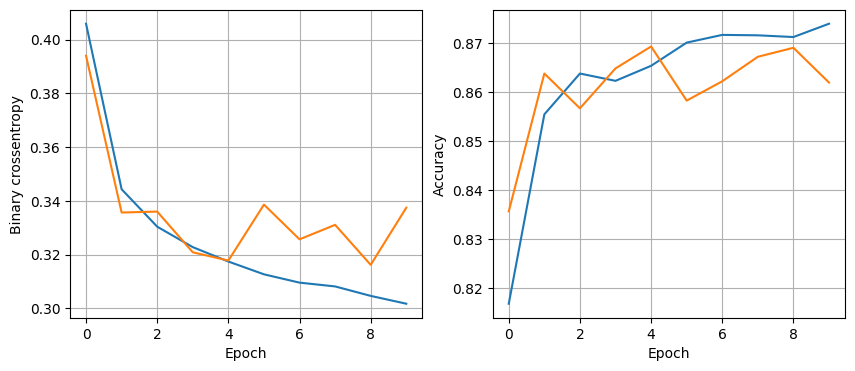

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8669 - loss: 0.3363
32 nodes, dropout 0, lr 0.05, batch size 32


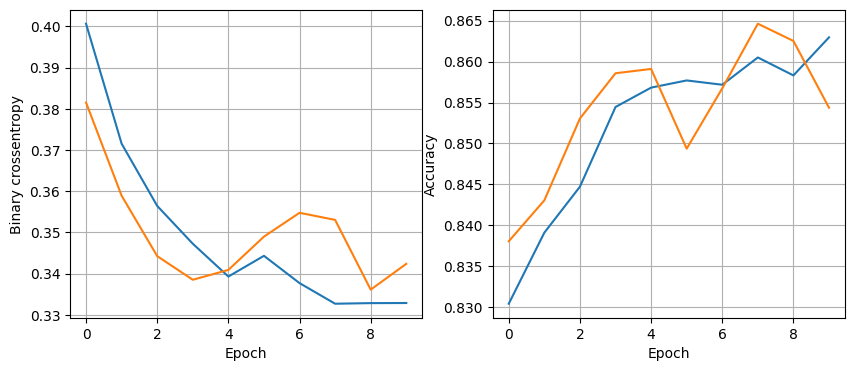

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8624 - loss: 0.3295
32 nodes, dropout 0, lr 0.05, batch size 64


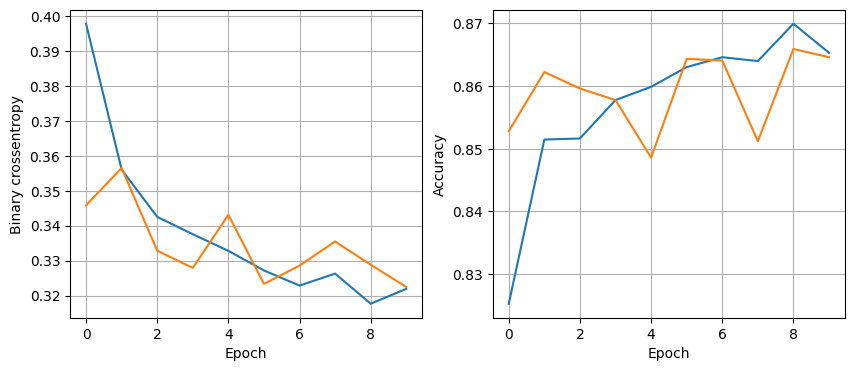

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8654 - loss: 0.3151
32 nodes, dropout 0, lr 0.05, batch size 128


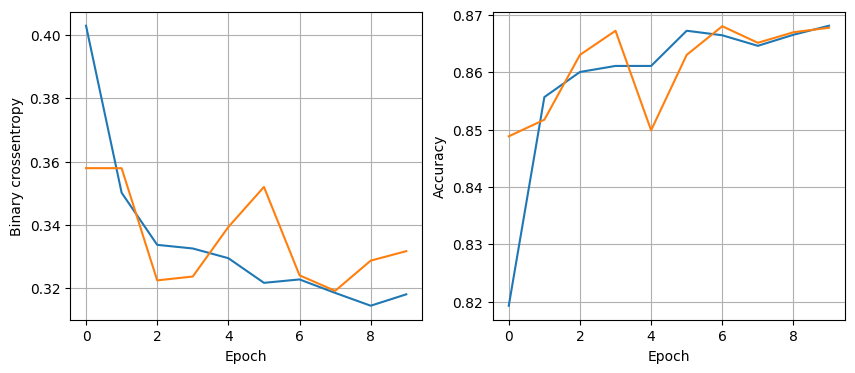

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8739 - loss: 0.3312
32 nodes, dropout 0, lr 0.001, batch size 32


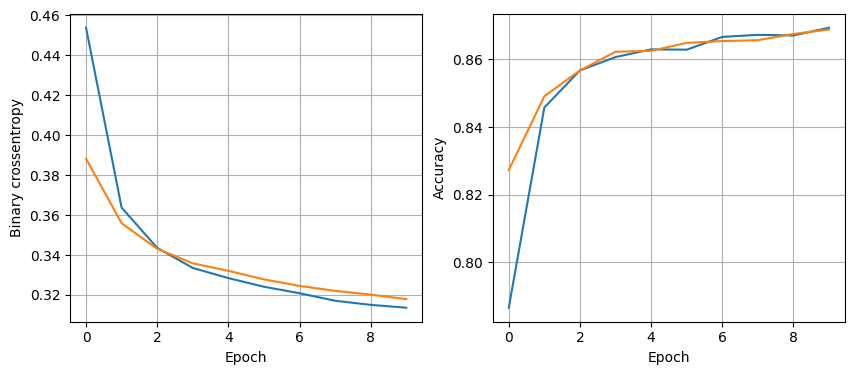

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8727 - loss: 0.3176
32 nodes, dropout 0, lr 0.001, batch size 64


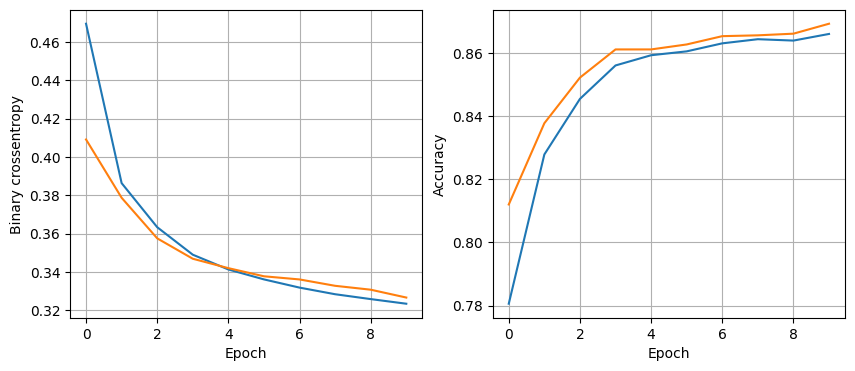

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8747 - loss: 0.3253
32 nodes, dropout 0, lr 0.001, batch size 128


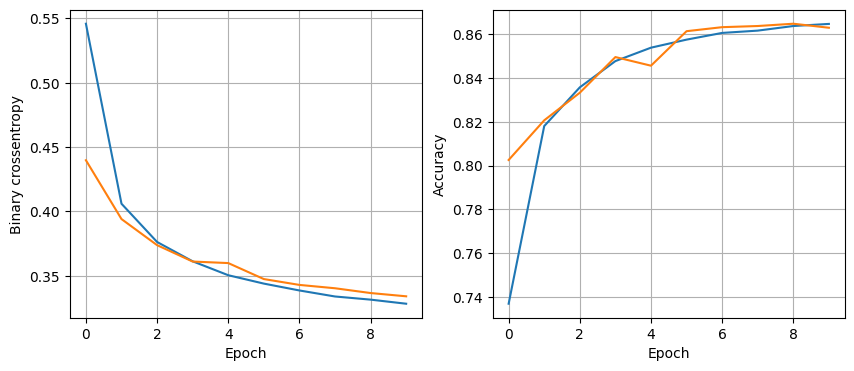

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8692 - loss: 0.3318
32 nodes, dropout 0.2, lr 0.01, batch size 32


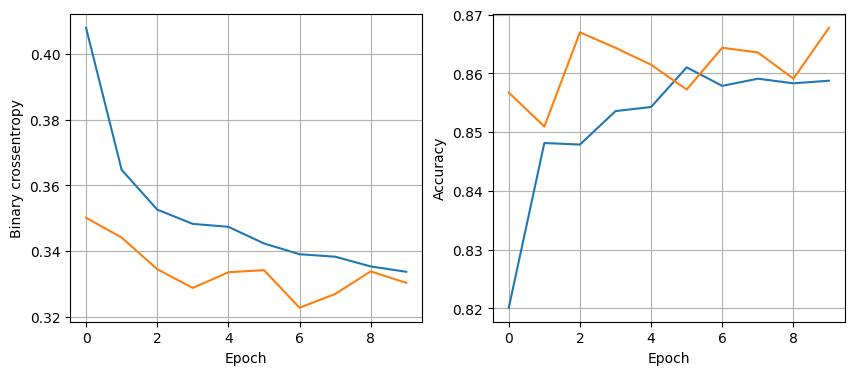

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8719 - loss: 0.3331
32 nodes, dropout 0.2, lr 0.01, batch size 64


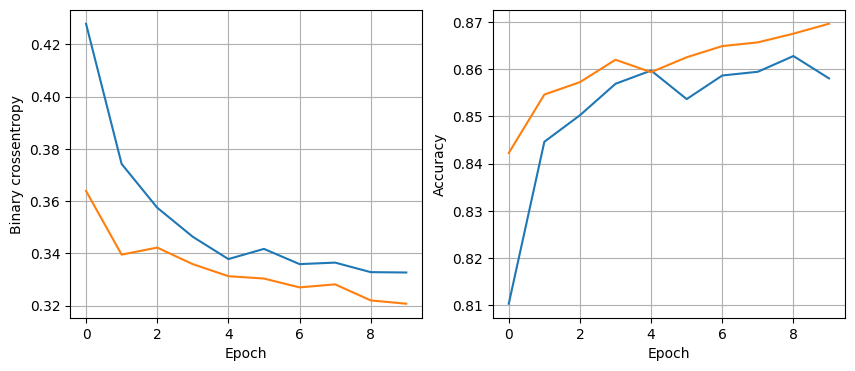

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8728 - loss: 0.3234
32 nodes, dropout 0.2, lr 0.01, batch size 128


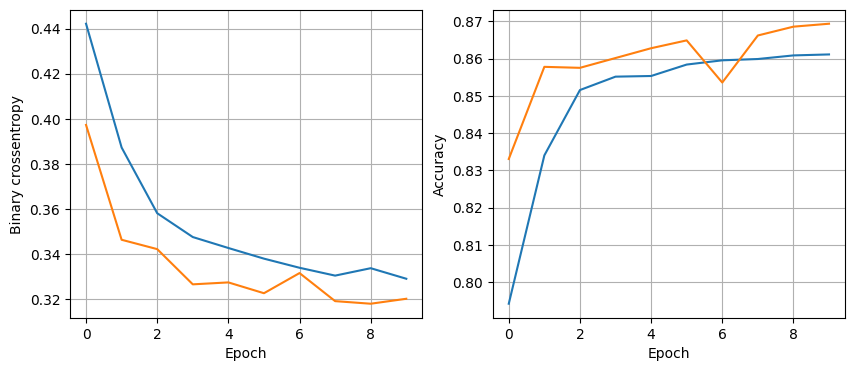

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8742 - loss: 0.3159
32 nodes, dropout 0.2, lr 0.05, batch size 32


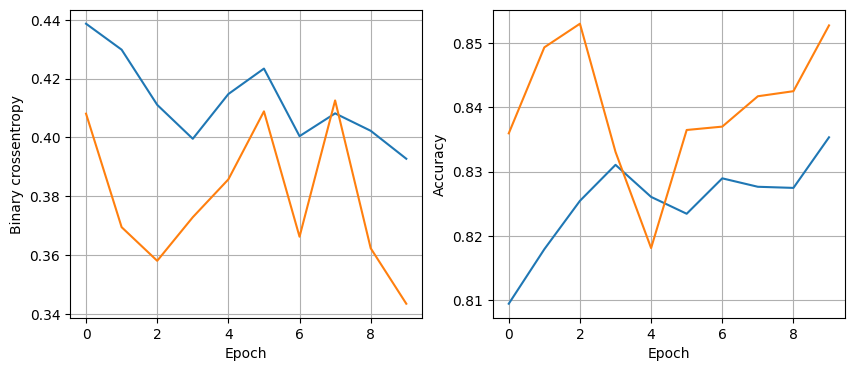

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8634 - loss: 0.3402
32 nodes, dropout 0.2, lr 0.05, batch size 64


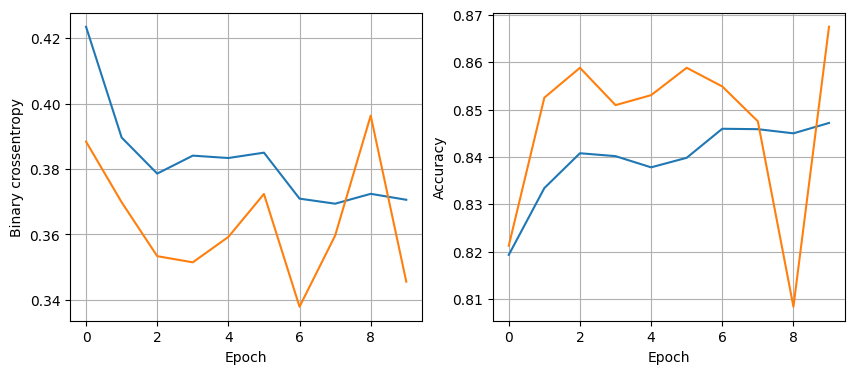

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8724 - loss: 0.3642
32 nodes, dropout 0.2, lr 0.05, batch size 128


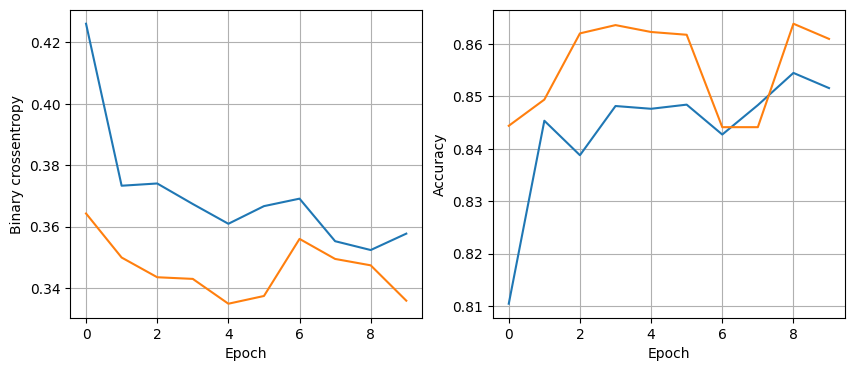

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8658 - loss: 0.3384
32 nodes, dropout 0.2, lr 0.001, batch size 32


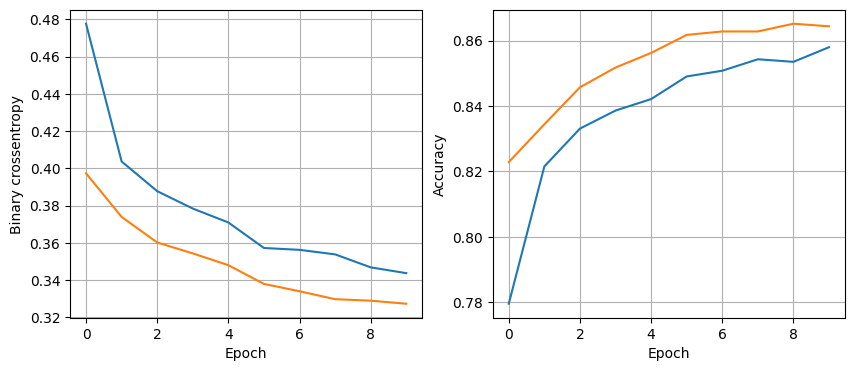

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8693 - loss: 0.3239
32 nodes, dropout 0.2, lr 0.001, batch size 64


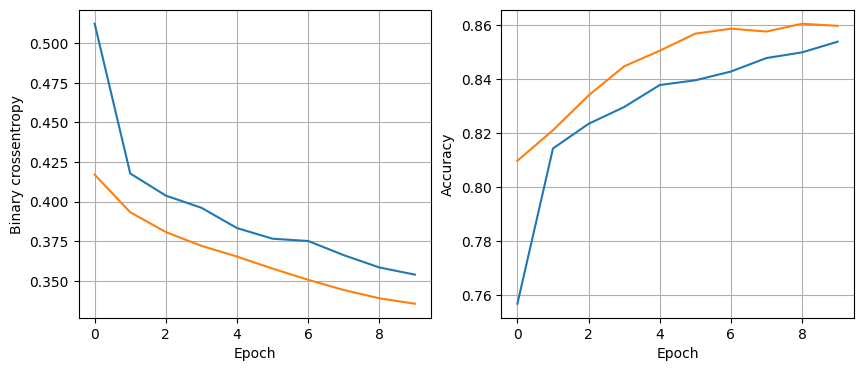

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8700 - loss: 0.3313
32 nodes, dropout 0.2, lr 0.001, batch size 128


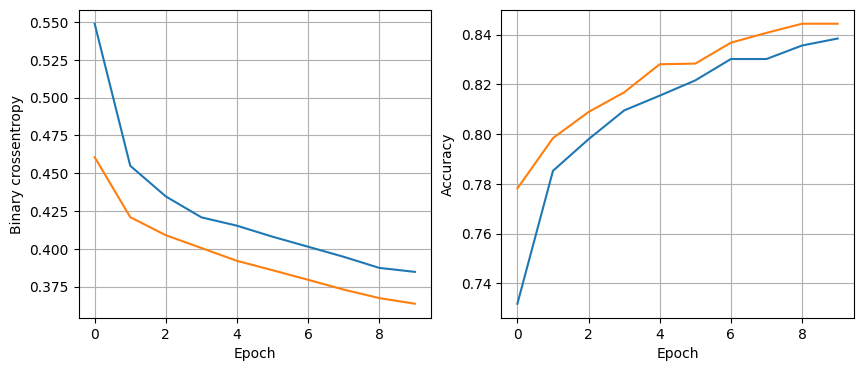

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8526 - loss: 0.3571


In [62]:
least_val_loss = float('inf')
least_loss_model = None
epochs=10
for num_nodes in [32]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.05, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train=X_train, y_train=y_train, num_nodes=num_nodes, dropout_prob=dropout_prob, lr=lr, batch_size=batch_size, epochs=epochs)
        plot_history(history)
        val_loss, val_accuracy = model.evaluate(X_valid, y_valid) # Unpack the metrics
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [63]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([0, 1, 1, ..., 1, 1, 0])

In [64]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1360
           1       0.86      0.95      0.90      2444

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.86      3804



In [65]:
import joblib
from sklearn.preprocessing import StandardScaler

least_loss_model.save("model.h5")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']